In [1]:
from career_analysis import BiasFinder

/home/paper3/ir-bias/venv/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
def plot_career_stats(career_data_path='./career_stats.tsv',
                      word_pairs_path='./word_pairs.csv'):
    bias_finder = BiasFinder(career_data_path='./career_data.tsv',
                             word_pairs_path='./word_pairs.csv')
    sources = sorted(bias_finder.get_eligible_sources())
    
    df_all = None
    colors = ['black', 'blue', 'brown', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'yellow']
    
    for idx, source in enumerate(sources):
        data = bias_finder.calculate_wefat(source)
        df = pd.DataFrame(list(data.values()),
                          columns=['Percentage of workers in occupation who are women',
                                   'Strength of association of occupation\n word vector with female gender (WEFAT)'])
        if not df_all:
            df_all = df.plot(x='Percentage of workers in occupation who are women',
                             y='Strength of association of occupation\n word vector with female gender (WEFAT)',
                             kind='scatter',
                             color=colors[idx],
                             s=30,
                             title='All news sources',
                             xlim=(0, 100),
                             ylim=(-2.0, 2.0))
        else:
            df.plot(x='Percentage of workers in occupation who are women',
                    y='Strength of association of occupation\n word vector with female gender (WEFAT)',
                    kind='scatter',
                    ax=df_all,
                    color=colors[idx],
                    s=30,
                    xlim=(0, 100),
                    ylim=(-2.0, 2.0))
            
        df.plot(x='Percentage of workers in occupation who are women',
                y='Strength of association of occupation\n word vector with female gender (WEFAT)',
                kind='scatter',
                color=colors[idx],
                s=60,
                title=str(source),
                xlim=(0, 100),
                ylim=(-2.0, 2.0))

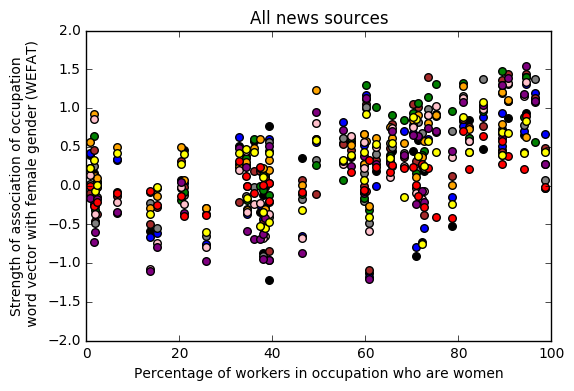

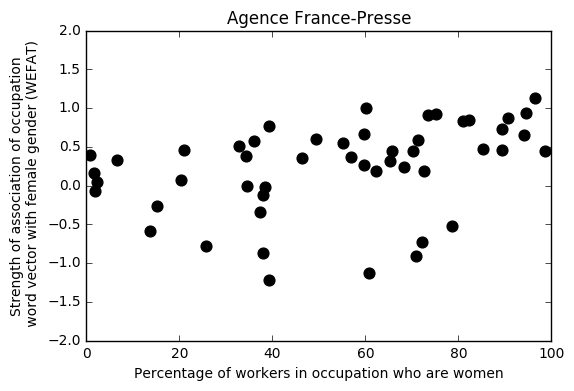

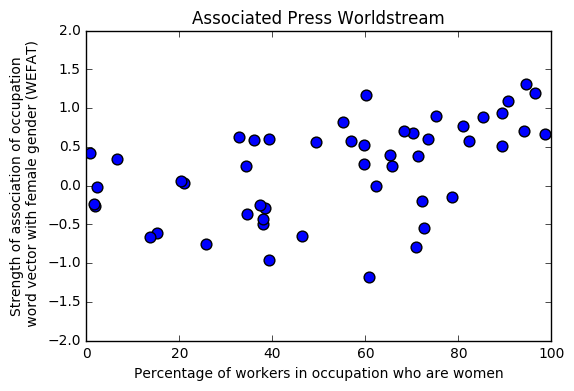

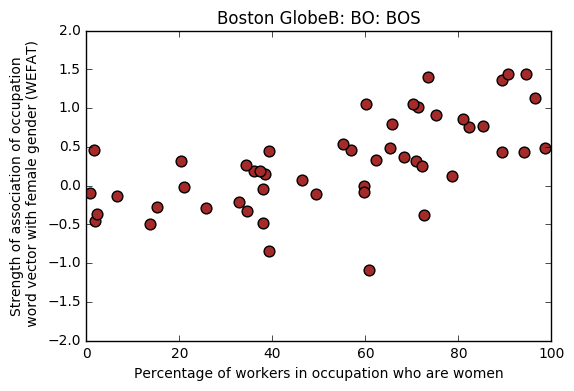

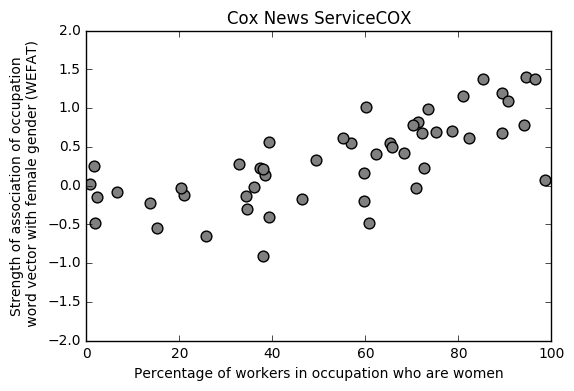

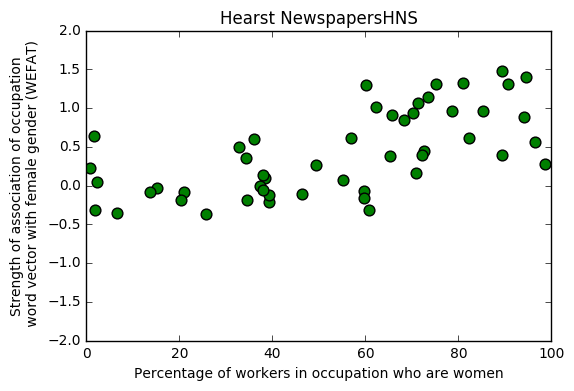

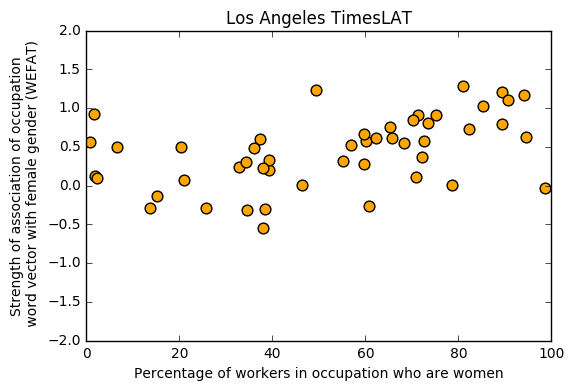

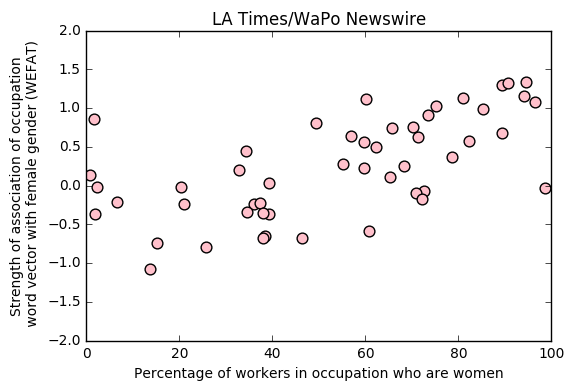

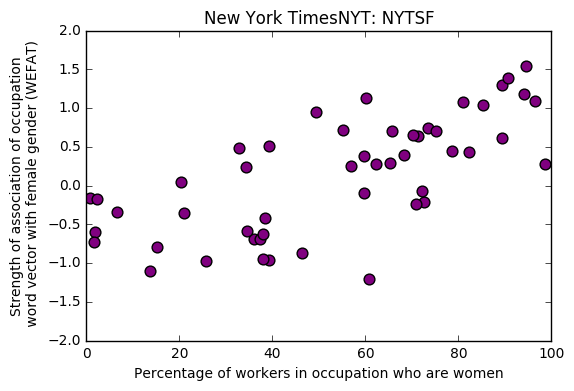

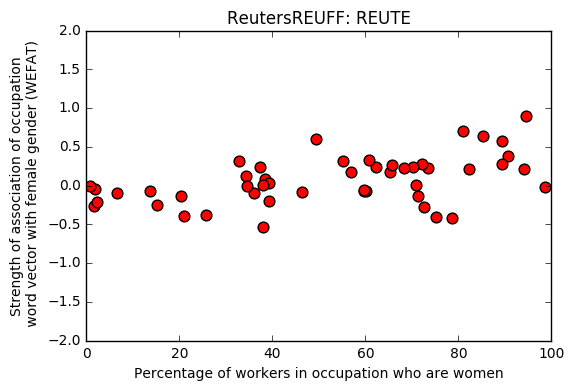

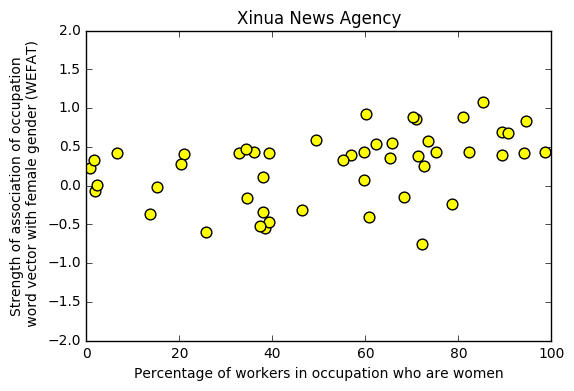

In [4]:
plot_career_stats()

In [5]:
def plot_career_stats_golden(career_data_path='./career_stats.tsv',
                             word_pairs_path='./word_pairs.csv'):
    bias_finder = BiasFinder(career_data_path='./career_data.tsv',
                             word_pairs_path='./word_pairs.csv')

    data = bias_finder.calculate_wefat()
    df = pd.DataFrame(list(data.values()),
                      columns=['Percentage of workers in occupation who are women',
                               'Strength of association of occupation\n word vector with female gender (WEFAT)'])

    df.plot(x='Percentage of workers in occupation who are women',
            y='Strength of association of occupation\n word vector with female gender (WEFAT)',
            kind='scatter',
            color='yellow',
            s=60,
            title='Golden Model (Google News)',
            xlim=(0, 100),
            ylim=(-2.0, 2.0))

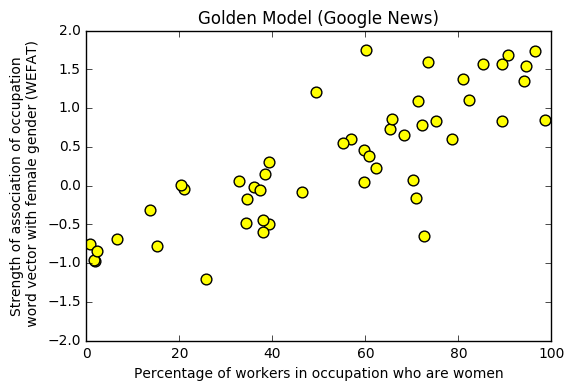

In [6]:
plot_career_stats_golden()